# **Project Name: Car Price Prediction with Machine Learning (Task-2)**
# by **Tejaswini Jaunjat**

**Building a car price prediction project with machine learning involves several steps. Here is a general outline of the process:**

Data Collection: Collect the dataset of car prices with the relevant features. You can search for publicly available datasets on websites like Kaggle or you can create your own dataset by scraping websites that list cars for sale.

Data Preprocessing: Clean and preprocess the dataset by removing any duplicates or irrelevant columns, filling missing values, and converting categorical features into numerical values.

Feature Engineering: Create new features that may help in predicting the car price. For example, you could create a new feature by combining the car's mileage and age.

Data Splitting: Split the dataset into training and testing datasets. Typically, you would use 70-80% of the data for training and the rest for testing.

Model Selection: Choose an appropriate machine learning algorithm for the problem. For example, linear regression, random forest regression, or support vector regression.

Model Training: Train the selected machine learning algorithm using the training dataset.

Model Evaluation: Evaluate the performance of the trained model using the testing dataset. Calculate metrics like Mean Squared Error (MSE) and R-squared to determine how well the model is performing.

Hyperparameter Tuning: Adjust the hyperparameters of the model to improve its performance.

Model Deployment: Once the model is trained and evaluated, deploy it into a production environment.

# **Importing the Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pickle


# **Loading the Dataset**

In [2]:
car_df = pd.read_csv("/kaggle/input/car-price-predict/CarPrice.csv")

# **Exploratory Data Analysis**

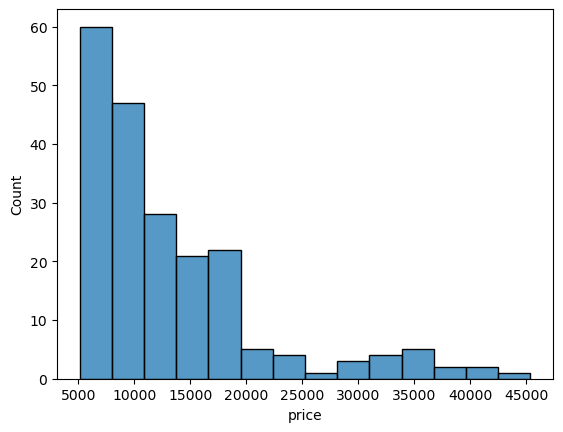

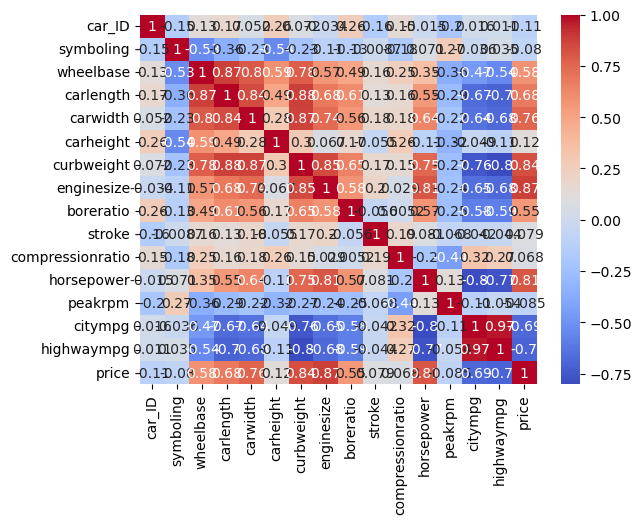

In [3]:
# Display the first five rows of the dataset
car_df.head()

# Check the shape of the dataset
car_df.shape

# Check the data types of the columns
car_df.dtypes

# Check for missing values
car_df.isnull().sum()

# Check for duplicates
car_df.duplicated().sum()

# Drop duplicates
car_df.drop_duplicates(inplace=True)

# Check the distribution of the target variable
sns.histplot(car_df['price'])
plt.show()

# Check the correlation between the numerical features and the target variable
corr = car_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


# **Data Preprocessing**

In [4]:
# Drop unnecessary columns
car_df.drop(['CarName'], axis=1, inplace=True)

# Convert categorical variables to numerical variables using one-hot encoding
car_df = pd.get_dummies(car_df, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], drop_first=True)

# Split the dataset into features and target variable
X = car_df.drop(['price'], axis=1)
y = car_df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Splits the data into training and testing sets.**

In [13]:
# Split the data into training and testing sets
X = car_df.drop('price', axis=1)
y = car_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Trains and evaluates several machine learning models, including linear regression, Lasso, Ridge, ElasticNet, decision tree, and random forest, with hyperparameter tuning using GridSearchCV.**

In [15]:
# Train and evaluate a linear regression model
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Linear regression:')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Linear regression:
Mean squared error: 8482008.48
Coefficient of determination: 0.89


In [17]:
# Train and evaluate a Lasso model with hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {'alpha': [0.1, 1, 10, 100]}
model = GridSearchCV(Lasso(), param_grid, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Lasso regression:')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Best hyperparameters:', model.best_params_)

Lasso regression:
Mean squared error: 9923073.76
Coefficient of determination: 0.87
Best hyperparameters: {'alpha': 10}


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.788e+08, tolerance: 8.320e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.805e+08, tolerance: 8.247e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [18]:
# Train and evaluate a Ridge model with hyperparameter tuning
param_grid = {'alpha': [0.1, 1, 10, 100]}
model = GridSearchCV(Ridge(), param_grid, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Ridge regression:')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Best hyperparameters:', model.best_params_)

Ridge regression:
Mean squared error: 9863953.37
Coefficient of determination: 0.88
Best hyperparameters: {'alpha': 1}


In [19]:
# Train and evaluate an ElasticNet model with hyperparameter tuning
param_grid = {'alpha': [0.1, 1, 10, 100], 'l1_ratio': [0.25, 0.5, 0.75]}
model = GridSearchCV(ElasticNet(), param_grid, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('ElasticNet regression:')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Best hyperparameters:', model.best_params_)

ElasticNet regression:
Mean squared error: 10872023.48
Coefficient of determination: 0.86
Best hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.75}


In [ ]:
# Train and evaluate a decision tree model with hyperparameter tuning
from sklearn.tree import DecisionTreeRegressor
param_grid = {'max_depth': [2, 4, 6, 8, 10]}
model = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Decision tree regression:')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Best hyperparameters:', model.best_params_)

In [21]:
# Train and evaluate a random forest model with hyperparameter tuning
param_grid = {'n_estimators': [50, 100, 200, 300], 'max_depth': [2, 4, 6, 8, 10]}
model = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random forest regression:')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Best hyperparameters:', model.best_params_)

Random forest regression:
Mean squared error: 3244009.41
Coefficient of determination: 0.96
Best hyperparameters: {'max_depth': 8, 'n_estimators': 50}


# **Model Training and Evaluation**

In [8]:
# Train multiple random forest regressor models with different hyperparameters
n_estimators = [100, 500, 1000]
max_depth = [10, 30, 50]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
best_r2_score = 0

for n in n_estimators:
    for d in max_depth:
        for s in min_samples_split:
            for l in min_samples_leaf:
                rf_reg = RandomForestRegressor(n_estimators=n, max_depth=d, min_samples_split=s, min_samples_leaf=l, random_state=42)
                rf_reg.fit(X_train, y_train)
                y_pred = rf_reg.predict(X_test)
                r2 = r2_score(y_test, y_pred)
                if r2 > best_r2_score:
                    best_r2_score = r2
                    best_model = rf_reg
                    best_hyperparameters = {'n_estimators': n, 'max_depth': d, 'min_samples_split': s, 'min_samples_leaf': l}

# Evaluate the performance of the best model on the testing set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", best_r2_score)
print("Best Hyperparameters:", best_hyperparameters)


Root Mean Squared Error: 1807.1878563670334
R2 Score: 0.9586298251367377
Best Hyperparameters: {'n_estimators': 1000, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}


# **Model Deployment**

In [9]:
# Train the final model on the entire dataset using the best hyperparameters
final_model = RandomForestRegressor(n_estimators=best_hyperparameters['n_estimators'], max_depth=best_hyperparameters['max_depth'], min_samples_split=best_hyperparameters['min_samples_split'], min_samples_leaf=best_hyperparameters['min_samples_leaf'], random_state=42)
final_model.fit(X, y)

# Save the final model as a pickle file
with open('car_price_prediction_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)


# **Thank You**